In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10, 6]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Image
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Fraud Detection in Python

A typical organization loses an estimated 5% of its yearly revenue to fraud. Here will learn how to fight fraud by using data. For example, learn how to apply supervised learning algorithms to detect fraudulent behavior similar to past ones, as well as unsupervised learning methods to discover new types of fraud activities. Moreover, in fraud analytics often deal with highly imbalanced datasets when classifying fraud versus non-fraud, and in this notebook will pick up some techniques on how to deal with that. 

## 1) Preparing the Data
### Checking the fraud to non-fraud ratio

If there are few cases of fraud, then there's little data to learn how to identify them. This is known as class imbalance, and it's one of the main challenges of fraud detection.

In [109]:
df = pd.read_csv("data_1\\creditcard_sampledata_3.csv")
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,...,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,-0.014675,0.044325,-0.035144,0.002494,-0.046625,-0.046340,-0.043020,-0.008398,-0.027331,-0.056943,...,-0.003516,-0.009421,-0.004147,-0.001200,-0.003314,-0.004836,-0.005726,0.002482,86.117232,0.009901
std,1.952784,1.558235,1.691458,1.493592,1.321320,1.254301,1.338170,1.323247,1.134506,1.278092,...,0.756735,0.724749,0.601276,0.599400,0.517363,0.481913,0.411055,0.302719,227.210259,0.099020
min,-25.266355,-18.701995,-26.823673,-4.575708,-18.664251,-6.357009,-23.783470,-41.484823,-8.504285,-17.141514,...,-20.262054,-5.532541,-17.026156,-2.307453,-3.308049,-1.715640,-7.976100,-5.048979,0.000000,0.000000
25%,-0.926226,-0.589562,-0.873696,-0.871759,-0.733235,-0.777552,-0.571678,-0.211263,-0.651215,-0.541561,...,-0.231508,-0.558904,-0.161166,-0.354973,-0.316947,-0.331584,-0.070963,-0.052133,4.990000,0.000000
50%,0.009592,0.088726,0.168377,-0.027034,-0.060932,-0.304225,0.036753,0.000985,-0.052724,-0.109888,...,-0.035204,-0.013332,-0.011305,0.038272,0.019200,-0.059882,0.003521,0.012842,20.260000,0.000000
75%,1.310062,0.809298,1.017166,0.763626,0.603678,0.356664,0.594029,0.313264,0.568374,0.437051,...,0.196481,0.509243,0.146835,0.441278,0.348177,0.228486,0.095662,0.077357,75.000000,0.000000
max,2.422508,14.323254,3.760965,11.885313,9.880564,7.473970,9.288494,16.633103,8.054123,12.562347,...,19.283602,5.805795,13.218751,3.535179,3.590787,2.961609,4.623508,9.876371,4584.880000,1.000000


In [110]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print("Fraud(1) to non-fraud(0) values")
display(occ)

# Print the ratio of fraud cases
occ = df['Class'].value_counts(normalize=True)
print("Fraud(1) to non-fraud(0) ratios")
display(occ)

Fraud(1) to non-fraud(0) values


0    5000
1      50
Name: Class, dtype: int64

Fraud(1) to non-fraud(0) ratios


0    0.990099
1    0.009901
Name: Class, dtype: float64

In [111]:
def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 29]
    y=np.array(y).astype(np.float)
    return X,y

In [112]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

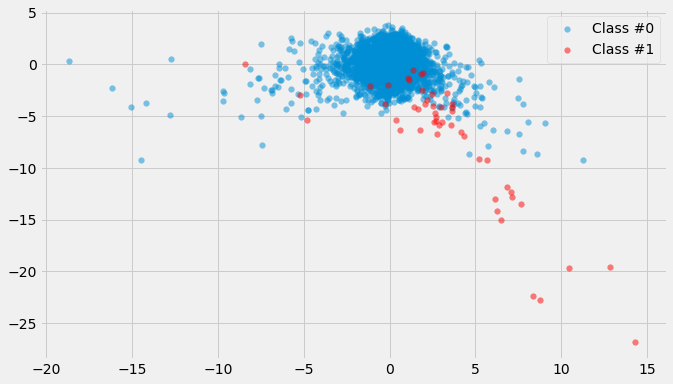

In [33]:
# Create X and y from the prep_data function 
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

### Data Resampling
### Applying SMOTE
Apply Synthetic Minority Over-sampling Technique (SMOTE). Unlike ROS, SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations.

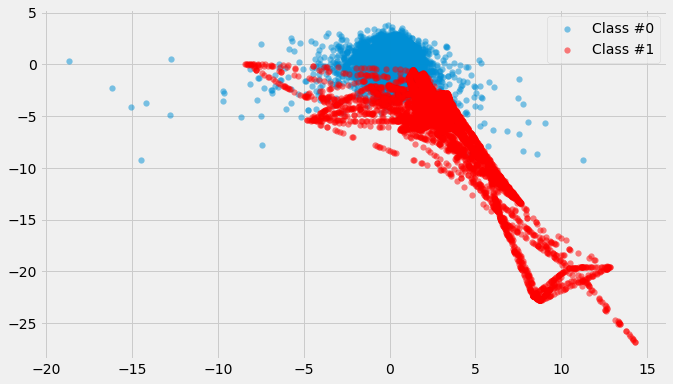

In [34]:
#Conda - imbalanced-learn is a python package offering a number of re-sampling techniques commonly used
#in datasets showing strong between-class imbalance. It is compatible with scikit-learn
#and is part of scikit-learn-contrib projects
from imblearn.over_sampling import SMOTE

# Define the resampling method
method = SMOTE(kind='regular')

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

Minority class more visible

In [35]:
#Compare SMOTE to original data
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))
print("\n")
# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

0.0    5000
1.0      50
dtype: int64


1.0    5000
0.0    5000
dtype: int64


 SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class

### Fraud Detection Algorithms 
### Exploring the traditional way to catch fraud
Define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

In [36]:
# Get the mean for each group
df.groupby('Class').mean()

# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df.V1 < -3,df.V3 < -5 ), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              4984  16
1                28  22


In [37]:
#try using sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(df.Class, df.flag_as_fraud)

array([[4984,   16],
       [  28,   22]], dtype=int64)

Detect 22 out of 50 fraud cases, but can't detect the other 28, and get 16 false positives. 

### Using ML classification to catch fraud

In [38]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1505
         1.0       0.89      0.80      0.84        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.94      0.90      0.92      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1504    1]
 [   2    8]]


We are getting much less false positives and we're catching a higher percentage of fraud cases, so that is also better than before.  Let's now explore whether we can improve the prediction results even further with resampling methods.

### Logistic regression combined with SMOTE

In [39]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind='borderline2')
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

### Using a pipeline

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1505
         1.0       0.62      1.00      0.77        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.81      1.00      0.88      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1499    6]
 [   0   10]]


SMOTE slightly improves our results. We now manage to find all cases of fraud, but we have a slightly higher number of false positives, 6 cases. Remember, not in all cases does resampling necessarily lead to better results. When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly.

## 2) Fraud Detection Using Labelled Data
How to flag fraudulent transactions with supervised learning. Use classifiers, adjust them and compare them to find the most efficient fraud detection model.

In [41]:
df = pd.read_csv("data_2\\creditcard_sampledata_2.csv")
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,-0.334597,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,-0.029903,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,1.465259,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,-0.165442,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,0.484216,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


### Natural hit rate
Explore how prevalent fraud is in the dataset, to understand what the "natural accuracy" is, if we were to predict everything as non-fraud. It's is important to understand which level of "accuracy" you need to "beat" in order to get a better prediction than by doing nothing. Create a random forest classifier for fraud detection. That will serve as the "baseline" model that you're going to try to improve.

In [42]:
X, y = prep_data(df)

# Count the total number of observations from the length of y
total_obs = y.shape[0]

# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print("Natural accuacy is {}".format(percentage))

Natural accuacy is 95.8904109589041


This tells us that by doing nothing, we would be correct in 95.9% of the cases. So now you understand, that if we get an accuracy of less than this number, our model does not actually add any value in predicting how many cases are correct.

## Random Forest Classifier
Create a first random forest classifier for fraud detection. Hopefully you can do better than the baseline accuracy you've just calculated, which was roughly 96%. This model will serve as the "baseline" model that you're going to try to improve

In [43]:
# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

# Print the accuracy performance metric
print("Accuracy score of Random Forest is {}".format(accuracy_score(y_test, predicted)))

Accuracy score of Random Forest is 0.9904109589041096


## Performance evaluation

When working with unbalanced datasets such as fraud detection accuracy will be a poor metric to choose.  As shown below just predicting everything as majority class leads to 97% accuracy.

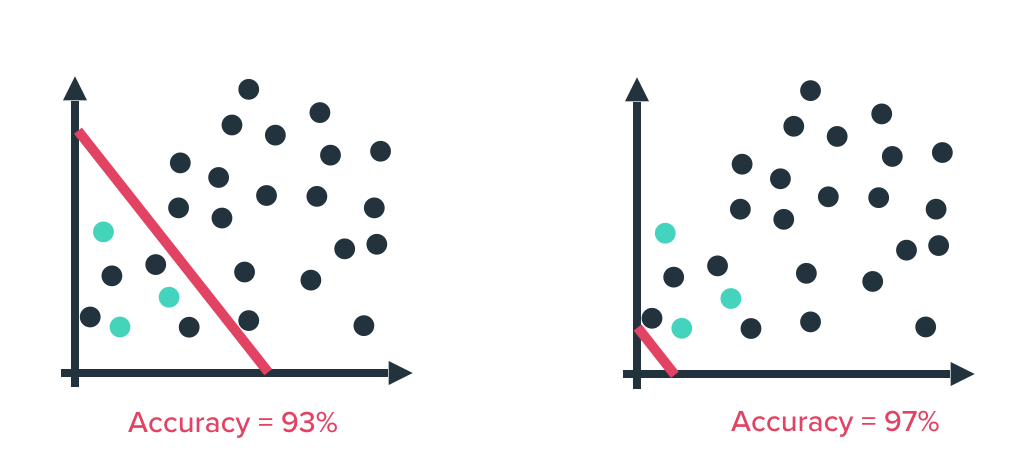

In [44]:
Image(filename='Page-10-Image-8.png',width=600,height=600)

#### Confusion Matrix

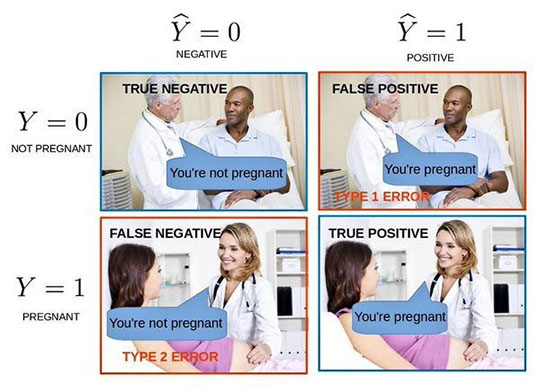

In [45]:
Image(filename='Page-11-Image-9_v2.jpg',width=600,height=600)

Fraud detection typically places more importance of Type 2 Errors

### Precision recall trade off

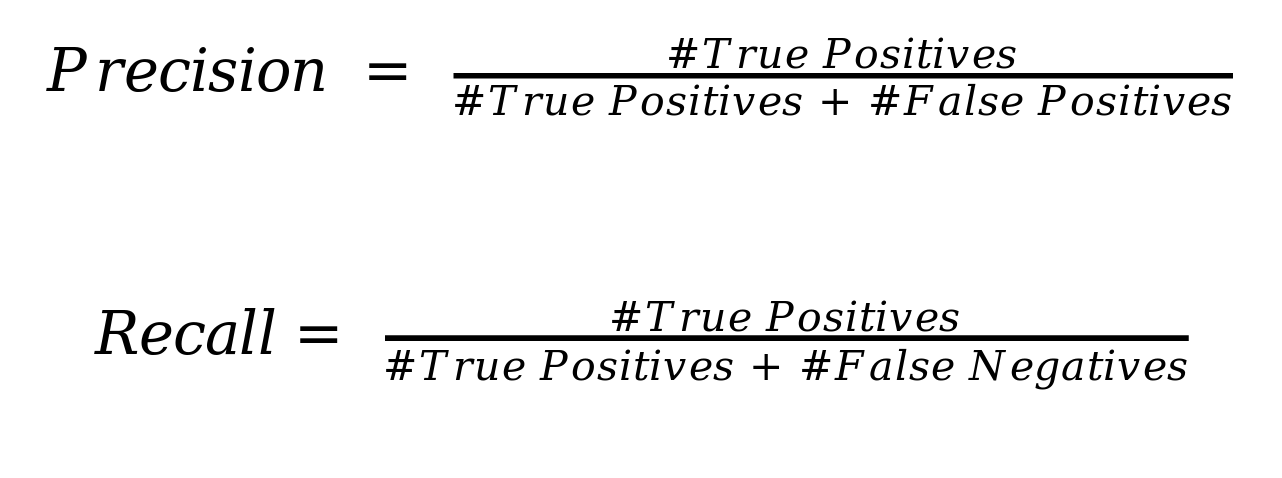

In [46]:
Image(filename='Page-12-Image-11.png',width=600,height=600)

Precision is fraction of actual fraud cases out of all predicted fraud cases.  Recall is the fraction of predicted fraud out of all the actual fraud cases. Precision and Recall are inversely related as shown below.

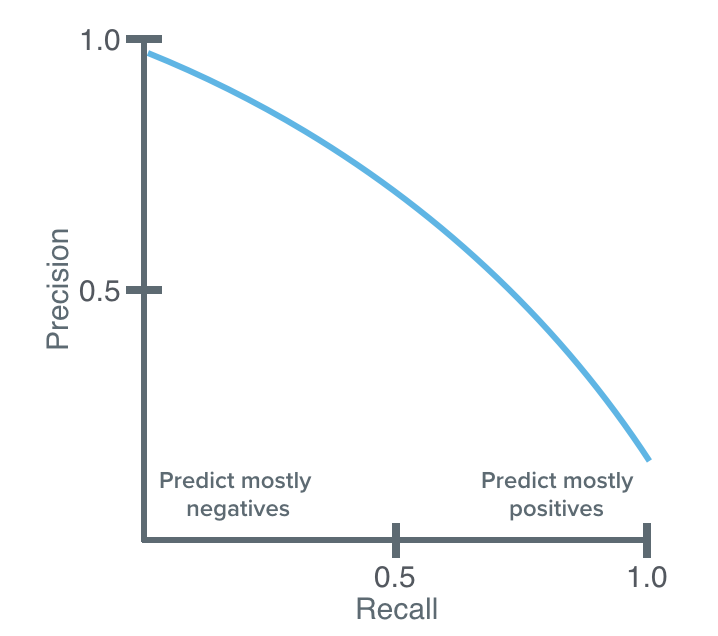

In [47]:
Image(filename='Page-12-Image-10.png',width=600,height=600)

F1 score takes into account both precision and recall

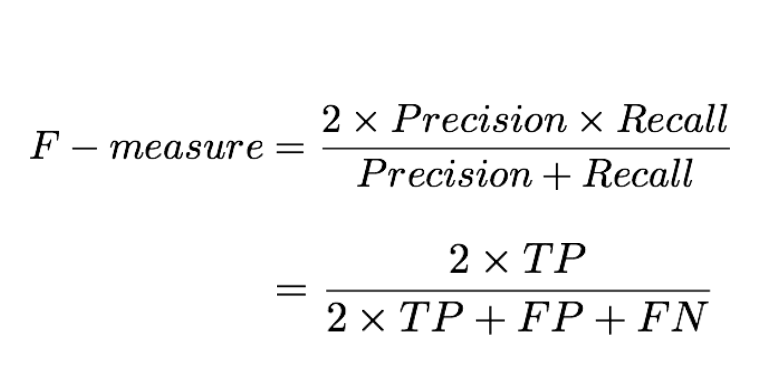

In [48]:
Image(filename='Page-12-Image-12.png',width=600,height=600)

### Performance metrics for the RF model
Know accuracy can be misleading in the case of fraud detection. With highly imbalanced fraud data, the AUROC curve is a more reliable performance metric, used to compare different classifiers. Moreover, the classification report tells you about the precision and recall of your model, whilst the confusion matrix actually shows how many fraud cases you can predict correctly.

In [49]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print("The roc auc score is {}".format(roc_auc_score(y_test, probs[:,1])))
print("-"*60)
print("The classification report is:")
print(classification_report(y_test, predicted))
print("-"*60)
print("The confusion matrix is:")
print(confusion_matrix(y_test, predicted))

The roc auc score is 0.9338879319822626
------------------------------------------------------------
The classification report is:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.96      0.80      0.87        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.98      0.90      0.93      2190
weighted avg       0.99      0.99      0.99      2190

------------------------------------------------------------
The confusion matrix is:
[[2096    3]
 [  18   73]]


 The model predicts 76 cases of fraud, out of which 73 are actual fraud. Only 3 false positives. As a result have a very high precision score. However, we don't catch 18 cases of actual fraud. Recall is therefore not as good as precision.

### Plotting the Precision Recall Curve
Plot a Precision-Recall curve, to investigate the trade-off between the two in your model. In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa. A balance between these two needs to be achieved in your model, otherwise you might end up with many false positives, or not enough actual fraud cases caught.

In [50]:
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post'),
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

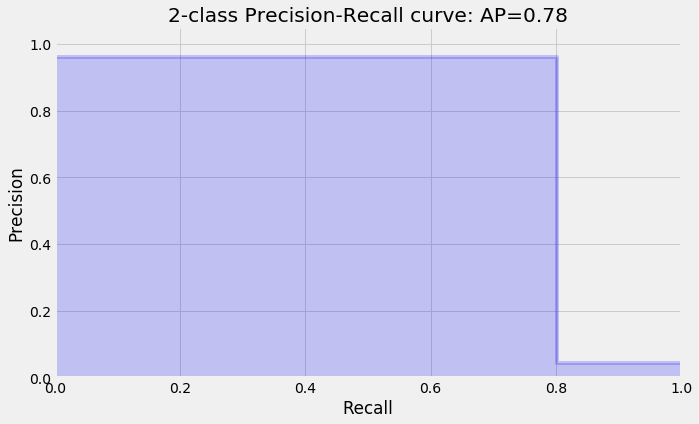

In [51]:
# Calculate average precision and the PR curve
#AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

The ROC curve plots the true positives vs. false positives , for a classifier, as its discrimination threshold is varied. Since, a random method describes a horizontal curve through the unit interval, it has an AUC of 0.5. Minimally, classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area under the ROC curve is larger), they have better expected performance.

### Adjusting the algorithm weights

A simple way to adjust the random forest model to deal with highly imbalanced fraud data, is to use the **class_weights** option when defining your sklearn model. However, as you will see, it is a bit of a blunt force mechanism and might not work for your very special case.

In [52]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print("The roc auc score is {}".format(roc_auc_score(y_test, probs[:,1])))
print("-"*60)
print("The classification report is:")
print(classification_report(y_test, predicted))
print("-"*60)
print("The confusion matrix is:")
print(confusion_matrix(y_test, predicted))

The roc auc score is 0.9347962661445273
------------------------------------------------------------
The classification report is:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.99      0.79      0.88        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

------------------------------------------------------------
The confusion matrix is:
[[2098    1]
 [  19   72]]


The model results don't improve drastically. We now have 3 less false positives, but now 19 instead of 18 false negatives, i.e. cases of fraud we are not catching. If we mostly care about catching fraud, and not so much about the false positives, this does actually not improve our model at all, albeit a simple option to try.

### Adjusting Random Forest to fraud detection
Define weights manually, to be able to off-set that imbalance slightly. In our case we have 300 fraud to 7000 non-fraud cases, so by setting the weight ratio to 1:12, we get to a 1/3 fraud to 2/3 non-fraud ratio, 

In [53]:
def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    probs = model.predict_proba(X_test)
    print("The classification report is:")
    print (classification_report(y_test, predicted))
    print("-"*60)
    print("The confusion matrix is:")
    print (confusion_matrix(y_test, predicted))

In [54]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:12}, criterion='entropy',

    # Change depth of model
    max_depth=10,

    # Change the number of samples in leaf nodes
    min_samples_leaf=10, 

    # Change the number of trees to use
    n_estimators=20, n_jobs=-1, random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

The classification report is:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.97      0.85      0.91        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.98      0.92      0.95      2190
weighted avg       0.99      0.99      0.99      2190

------------------------------------------------------------
The confusion matrix is:
[[2097    2]
 [  14   77]]


Have effectively reduced the number of false negatives, i.e. you are catching more cases of fraud, whilst keeping the number of false positives low.

### GridSearchCV to find optimal parameters
Since for fraud detection we are mostly interested in catching as many fraud cases as possible, we can optimize the model settings to get the best possible Recall score. If we also cared about reducing the number of false positives, we could optimize on F1-score, this gives that nice Precision-Recall trade-off.

In [55]:
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'],  'max_depth': [4, 8], 
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
print("The best model params are:")
CV_model.best_params_

The best model params are:


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 30}

### Model results using GridSearchCV
The best parameters for the  model are that the split criterion should be set to 'gini', the number of estimators (trees) should be 30, the maximum depth of the model should be 8 and the maximum features should be set to "log2".

In [56]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12},criterion='gini',
            max_depth=8, max_features='log2',  min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

The classification report is:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.95      0.84      0.89        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190

------------------------------------------------------------
The confusion matrix is:
[[2095    4]
 [  15   76]]


Managed to improve the  model even further. The number of false positives has now been slightly reduced even further, which means we are catching more cases of fraud. However, the number of false positives actually went up. That is that Precision-Recall trade-off in action. To decide which final model is best, need to take into account how bad it is not to catch fraudsters, versus how many false positives the fraud analytics can handle.

### Using Ensemble Methods
Combine three algorithms into one model with the VotingClassifier. This allows us to benefit from the different aspects from all models, and hopefully improve overall performance and detect more fraud. The first model, the Logistic Regression, has a slightly higher recall score than our optimal Random Forest model, but gives a lot more false positives. You'll also add a Decision Tree with balanced weights to it.

In [57]:
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

The classification report is:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2099
         1.0       0.63      0.88      0.73        91

   micro avg       0.97      0.97      0.97      2190
   macro avg       0.81      0.93      0.86      2190
weighted avg       0.98      0.97      0.98      2190

------------------------------------------------------------
The confusion matrix is:
[[2052   47]
 [  11   80]]


See the Logistic Regression has quite different performance from the Random Forest. More false positives, but also a better Recall. It will therefore will a useful addition to the Random Forest in an ensemble model. 

### Voting Classifier
Let's combine three machine learning models into one, to improve our Random Forest fraud detection model from before. Combine our usual Random Forest model, with the Logistic Regression from the previously with a simple Decision Tree.

In [58]:
# Import the package
from sklearn.ensemble import VotingClassifier

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
            min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='soft')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

The classification report is:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.92      0.86      0.89        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.96      0.93      0.94      2190
weighted avg       0.99      0.99      0.99      2190

------------------------------------------------------------
The confusion matrix is:
[[2092    7]
 [  13   78]]


Increased the cases of fraud catching from 76 to 78, and you only have 3 extra false positives in return. If you do care about catching as many fraud cases as you can, whilst keeping the false positives low, this is a pretty good trade-off. The Logistic Regression as a standalone was quite bad in terms of false positives, and the Random Forest was worse in terms of false negatives

### Adjust weights within the Voting Classifier
The Voting Classifier allows us to improve fraud detection performance, by combining good aspects from multiple models. Now let's try to adjust the weights we give to these models. By increasing or decreasing weights we can play with how much emphasis we give to a particular model relative to the rest. This comes in handy when a certain model has overall better performance than the rest, but you still want to combine aspects of the others to further improve your results.

In [59]:
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], 
                                  voting='soft', weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

The classification report is:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.94      0.85      0.89        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190

------------------------------------------------------------
The confusion matrix is:
[[2094    5]
 [  14   77]]


## 3) Fraud detection using unlabelled data

### Using bank transaction data to determine unusual behaviour

In [90]:
plt.rcParams['figure.figsize'] = [8, 6]

df = pd.read_csv("data_3\\banksim_adj.csv")
y = df.fraud.values
df.drop(['Unnamed: 0','fraud','M'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189 entries, 0 to 7188
Data columns (total 16 columns):
age                      7189 non-null int64
amount                   7189 non-null float64
es_barsandrestaurants    7189 non-null int64
es_contents              7189 non-null int64
es_fashion               7189 non-null int64
es_food                  7189 non-null int64
es_health                7189 non-null int64
es_home                  7189 non-null int64
es_hotelservices         7189 non-null int64
es_hyper                 7189 non-null int64
es_leisure               7189 non-null int64
es_otherservices         7189 non-null int64
es_sportsandtoys         7189 non-null int64
es_tech                  7189 non-null int64
es_transportation        7189 non-null int64
es_travel                7189 non-null int64
dtypes: float64(1), int64(15)
memory usage: 898.7 KB


In the dataframe we have age, the amount spent and in what category.  Get data ready for Kmeans clustering by first scaling the data

## Kmeans Clustering

In [83]:
# Import the scaler
from sklearn.preprocessing import MinMaxScaler

# Transform df into a numpy array
X = np.array(df).astype(np.float)

# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
from sklearn.cluster import MiniBatchKMeans

# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

Need to find the optimum number of clusters to use

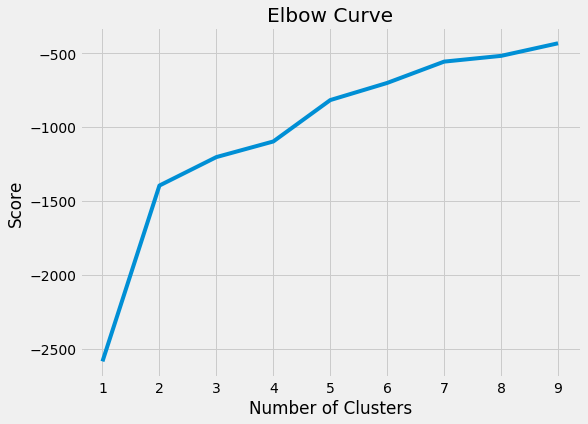

In [85]:
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

 Optimal number of clusters should probably be at around 3 clusters, lets try to use this value

Cluster the data and flag those samples furthest away from the centroids.  Flag those samples further than 0.95 percentile from centroid

In [92]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

Checking model results
Flagged all observations to be fraud, if they are in the top 5th percentile in distance from the cluster centroid. I.e. these are the very outliers of the three clusters

In [94]:
# Obtain the ROC score
print("Area under ROC curve is {}".format(roc_auc_score(y_test,km_y_pred)))

Area under ROC curve is 0.8286293965927947


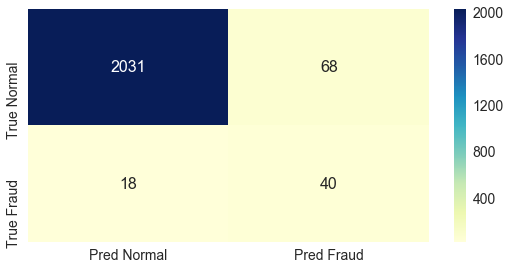

In [99]:
def plot_confusion_matrix(km_cm):
    df_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (8,4))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt = 'g',cmap="YlGnBu")
    plt.show()

# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm)

Significant number of false positives

In [103]:
kmeans.cluster_centers_

array([[0.36238532, 0.10780661, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.48765432, 0.33619082, 0.07407407, 0.00823045, 0.0781893 ,
        0.28395062, 0.20987654, 0.01234568, 0.01234568, 0.05761317,
        0.        , 0.00411523, 0.07407407, 0.02057613, 0.        ,
        0.01234568],
       [0.7677665 , 0.11459314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ]])

## DB scan
Explore using a density based clustering method (DBSCAN) to detect fraud. The advantage of DBSCAN is that you do not need to define the number of clusters beforehand. Also, DBSCAN can handle weirdly shaped data (i.e. non-convex) much better than K-means can. Now take the outliers of the clusters and use that for fraud, but take the smallest clusters in the data and label those as fraud

In [124]:
df = pd.read_csv("data_3\\banksim_adj.csv")
labels = df.fraud.values
df.drop(['Unnamed: 0','fraud','M'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189 entries, 0 to 7188
Data columns (total 16 columns):
age                      7189 non-null int64
amount                   7189 non-null float64
es_barsandrestaurants    7189 non-null int64
es_contents              7189 non-null int64
es_fashion               7189 non-null int64
es_food                  7189 non-null int64
es_health                7189 non-null int64
es_home                  7189 non-null int64
es_hotelservices         7189 non-null int64
es_hyper                 7189 non-null int64
es_leisure               7189 non-null int64
es_otherservices         7189 non-null int64
es_sportsandtoys         7189 non-null int64
es_tech                  7189 non-null int64
es_transportation        7189 non-null int64
es_travel                7189 non-null int64
dtypes: float64(1), int64(15)
memory usage: 898.7 KB


In [126]:
# Import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import silhouette_score

# Initialize and fit the DBscan model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in labels else 0)

# Print performance metrics for DBscan
print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % homogeneity_score(labels, pred_labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))

Estimated number of clusters: 15
Homogeneity: 0.628
Silhouette Coefficient: 0.726


Greater number of clusters than with KMeans.  Look at the clusters and see which to flag as fraud

- figure out how big the clusters are, and filter out the smallest
- take the smallest ones and flag those as fraud
- check with the original labels whether this does actually do a good job in detecting fraud.

In [150]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels >= 0])

print("Number of observations in each cluster is: {}".format(counts))

# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

print("The smallest clusters are clusters: {}".format(smallest_clusters))      


print("Their counts are:")      
print(counts[smallest_clusters])

Number of observations in each cluster is: [5966  243   80  293  198   97   30   76   89   24   39   13   10   18
   13]
The smallest clusters are clusters: [12 11 14]
Their counts are:
[10 13 13]


Know which smallest clusters you could flag as fraud. If we take more of the smallest clusters, could cast your net wider and catch more fraud, but most likely also more false positives.

Check the results of your DBscan fraud detection model.

In this case, Use the fraud labels to check your model results.

In [151]:
# Create a dataframe of the predicted cluster numbers and fraud labels 
df = pd.DataFrame({'clusternr':pred_labels,'fraud':labels})

# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df.clusternr==21)|(df.clusternr==17)|(df.clusternr==9),1 , 0)

# Run a crosstab on the results 
print(pd.crosstab(labels,df.predicted_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6970  19
1               195   5


Compare to the K-means model? The good thing is: our of all flagged cases, roughly 2/3 are actually fraud.  Since you only take the three smallest clusters, by definition you flag less cases of fraud, so you catch less but also have less false positives. However, you are missing quite a lot of fraud cases. Increasing the amount of smallest clusters you flag could improve that, at the cost of more false positives 